# 分類Fashion_mnist圖片

ref:https://www.kaggle.com/code/orhansertkaya/convolutional-neural-network-cnn-fashion-mnist/notebook

In [1]:
#載入所需環境
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
#載入fashion mnist dataset 有70000張灰階影像 10個類別 28*28像素
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
#讀取數據
(train_images , train_labels), (test_images, test_labels ) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

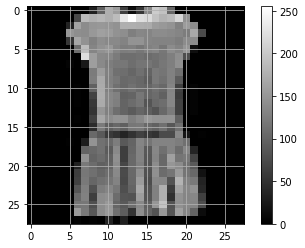

In [7]:
#檢查數據讀取
plt.figure()
plt.imshow(train_images[3],cmap="gray")
plt.colorbar()
plt.grid(True) #繪出網格線
plt.show()

## 特徵標準化(normalization)、可視化(visualize)
將特徵資料按比例縮放，讓資料落在某一特定的區間。

Normalization 的好處：把每一個 Layer 的 feature 都做 Normalization 後，
對於每一個 Layer 而言，確保 output 的 Statistic(統計值) 是固定的

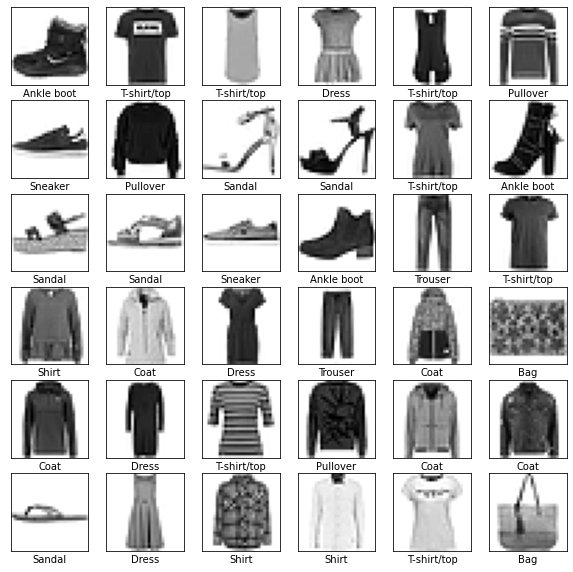

In [ ]:
#normalize輸入的訓練集到0-1之間
train_images = train_images / 255.0
test_images = test_images / 255.0

#畫出 6X6=36張圖片
plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1) #36張子圖片 排序為 0 1 2 3 4 5 6 7 ... 36

  plt.xticks([]) #x軸刻度
  plt.yticks([]) #y軸刻度
  plt.grid(False) #網格線

  plt.imshow(train_images[i],cmap=plt.cm.binary) #畫出圖片 cmap=顏色

  plt.xlabel(class_names[train_labels[i]]) #x軸標示
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


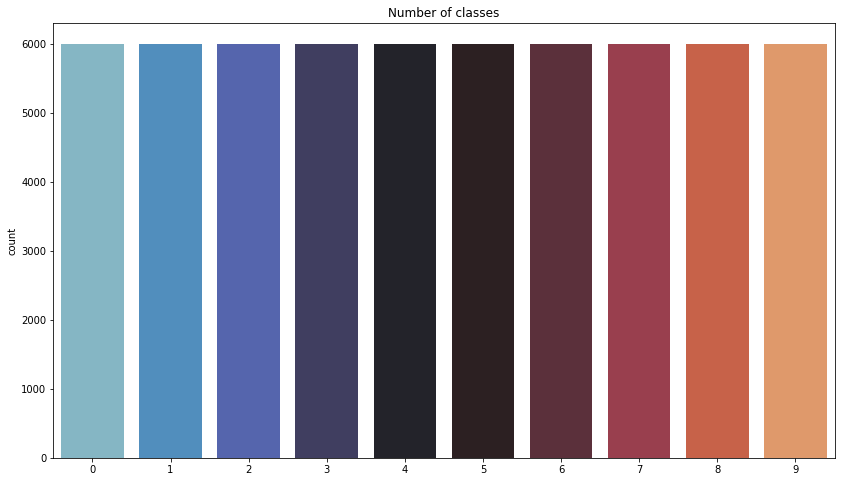

In [ ]:
import seaborn as sns
#畫出長條圖並且看每個類別有幾個 training_data
plt.figure(figsize=(14,8))
sns.countplot(train_labels, palette="icefire")
plt.title("Number of classes")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


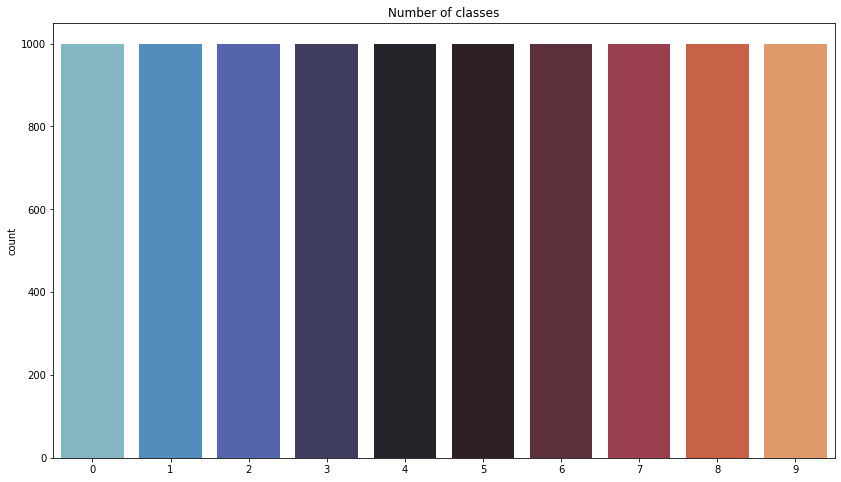

In [ ]:
#畫出長條圖並且看每個類別有幾個 testing_data
plt.figure(figsize=(14,8))
sns.countplot(test_labels, palette="icefire")
plt.title("Number of classes")
plt.show()

## Reshaping 
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.



In [ ]:
# Reshaping

X_train = np.expand_dims(train_images,axis=3)
X_test = np.expand_dims(test_images,axis=3)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


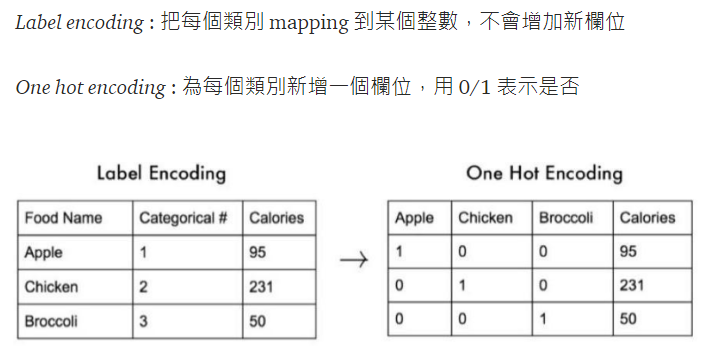

In [ ]:
# Label Encoding (be careful! run just once!)
from keras.utils.np_utils import to_categorical 

# convert to one-hot-encoding(one hot vectors)
Y_train = to_categorical(train_labels, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)
Y_test = to_categorical(test_labels, num_classes = 10)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


## Train-Test Split
We split the data into train and test sets.
1. test size is 10%.
2. train size is 90%.


In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


# Convolutional Neural Network

## 建立模型

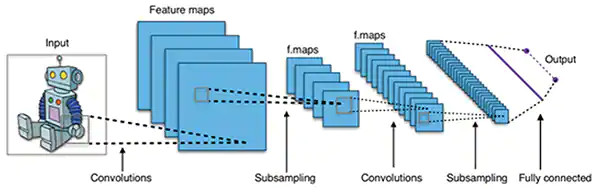

Normaliation 可以放在 activation function 之前，也可以放在 activation function 之後


我們採用把 Normalization 放在 activation 之前，因為有些 activation function 
像是 tanh 或是 sigmoid 會有 saturation region，我們不喜歡 input 會落在 saturation region


所以先做 Normalization 在丟進 activation function 
可以比較能夠確保我們的值不會掉進 saturation region

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import adam_v2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0

## 訓練模型

Adam Optimizer 其實可以說就是把Momentum 跟 AdaGrad這二種Optimizer做結合


Adam 保留了 Momentum 對過去梯度的方向做梯度速度調整與Adam對過去梯度的平方值做learning rate的調整，

再加上Adam有做參數的”偏離校正”，使得每一次的學習率都會有個確定的範圍，會讓參數的更新較為平穩。

In [ ]:
# Define the optimizer
optimizer = adam_v2.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
# Define the optimizer
# optimizer = tf.keras.optimizers.RMSprop(lr = 0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 50 # for better result increase the epochs
batch_size = 100

## Data Augmentation

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # 以每一張feature map為單位將平均值設為0
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # 以每一張feature map為單位將數值除以其標準差(上述兩步驟就是我們常見的Standardization)
        samplewise_std_normalization=False,  #  將输入的每個樣本除以其自身的標準差。
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # 隨機旋轉圖片
        zoom_range = 0.1, #  隨機縮放範圍
        width_shift_range=0.1,  #  水平平移，相對總寬度的比例
        height_shift_range=0.1,  # 垂直平移，相對總高度的比例
        horizontal_flip=False,  # 一半影象水平翻轉
        vertical_flip=False)  # 一半影象垂直翻轉

datagen.fit(x_train)

In [ ]:
# save the best weights
checkpointer = ModelCheckpoint(filepath="助教課/fashion_mnist_model.h5", verbose=1, save_best_only=True)

當資料集過於龐大，如何有效的降低資料佔據記憶體的空間
- 產生器(generator)是一種副程式，不同於一般副程式執行到return後，會將副程式完全結束掉，當產生器執行到yield後，會將副程式狀態保留，暫停至下一次呼叫。

In [ ]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),shuffle=True,epochs=epochs, 
                              validation_data = (x_val, y_val),
                              verbose = 2, #verbose=2過程全顯示
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[checkpointer]) #we save the best weights with checkpointer

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.44108, saving model to 助教課/fashion_mnist_model.h5
540/540 - 27s - loss: 0.4896 - accuracy: 0.8182 - val_loss: 0.4411 - val_accuracy: 0.8438 - 27s/epoch - 50ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.44108 to 0.26764, saving model to 助教課/fashion_mnist_model.h5
540/540 - 14s - loss: 0.3479 - accuracy: 0.8711 - val_loss: 0.2676 - val_accuracy: 0.8995 - 14s/epoch - 26ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.26764 to 0.25348, saving model to 助教課/fashion_mnist_model.h5
540/540 - 14s - loss: 0.3062 - accuracy: 0.8852 - val_loss: 0.2535 - val_accuracy: 0.9058 - 14s/epoch - 27ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.25348 to 0.24472, saving model to 助教課/fashion_mnist_model.h5
540/540 - 15s - loss: 0.2843 - accuracy: 0.8945 - val_loss: 0.2447 - val_accuracy: 0.9128 - 15s/epoch - 27ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.24472 to 0.21413, saving model to 助教課/fashion_mnist_model.h5
540/540 - 15s

##畫出結果

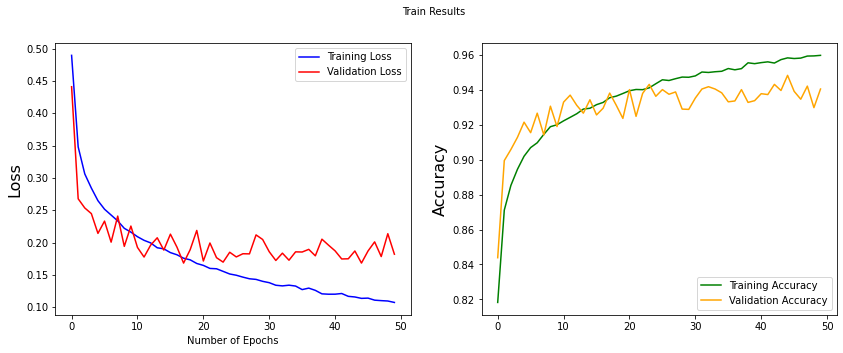

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**model.evaluate跟model.predict的不同**

- 輸入輸出不同

  - model.evaluate輸入數據(data)和黃金標準(label),然後將預測結果與黃金標準相比較,得到兩者誤差並輸出.

  - model.predict輸入數據(data),輸出**預測**結果

- 是否需要真實標籤(黃金標準)

  - model.evaluate需要,因為需要比較預測結果與真實標籤的誤差

  - model.predict不需要,只是單純輸出預測結果,全程不需要黃金標準的參與.

In [ ]:
#輸入數據(data)和黃金標準(label),然後將預測結果與黃金標準相比較,得到兩者誤差並輸出
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.20567341148853302
Test Accuracy: 0.9348000288009644


(10000, 28, 28, 1)


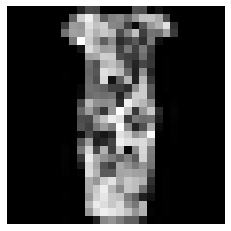

In [ ]:
#洋裝 Dress
print(X_test.shape)
plt.imshow(X_test[100].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
trueY = Y_test[100]
img = X_test[100]
test_img = img.reshape(1,28,28,1)

#預測類別
preds = np.argmax((model.predict(test_img) > 0.5).astype("int32"))
#預測機率
prob = model.predict(test_img)

print("trueY: ",np.argmax(trueY))
print("Preds: ",preds)
print("Prob: ",prob)

trueY:  3
Preds:  3
Prob:  [[5.2693753e-07 9.9148278e-10 2.6775013e-11 9.9999583e-01 1.0470633e-08
  3.1832906e-10 3.7297880e-06 9.5493648e-12 1.5977794e-10 2.2676618e-09]]


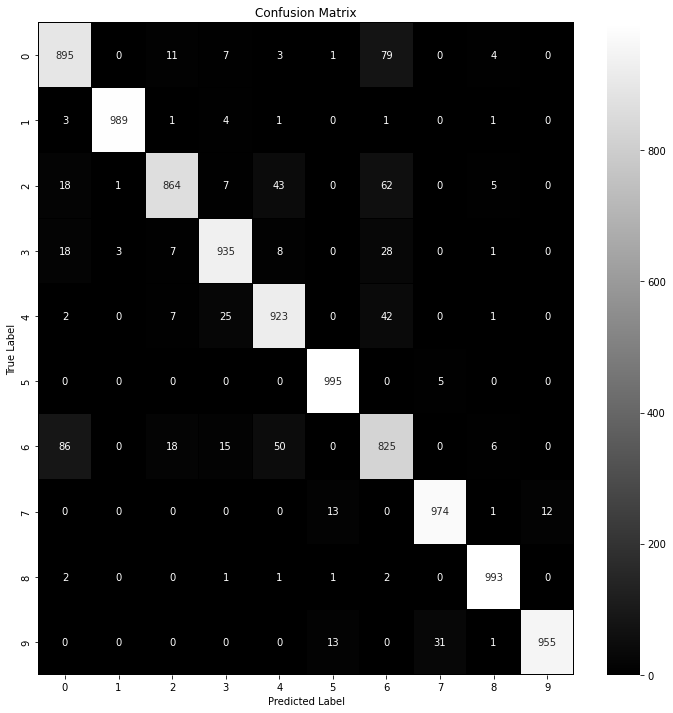

In [ ]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 105 out of 1000
Percentage of True Prediction: 89.50%
***********************************************************
Class: 1
Number of Wrong Prediction: 11 out of 1000
Percentage of True Prediction: 98.90%
***********************************************************
Class: 2
Number of Wrong Prediction: 136 out of 1000
Percentage of True Prediction: 86.40%
***********************************************************
Class: 3
Number of Wrong Prediction: 65 out of 1000
Percentage of True Prediction: 93.50%
***********************************************************
Class: 4
Number of Wrong Prediction: 77 out of 1000
Percentage of True Prediction: 92.30%
***********************************************************
Class: 5
Number of Wrong Prediction: 5 out of 1000
Percentage of True Prediction: 99.50%
***********************************************************
Class: 6
Number of Wrong Prediction: 175 out of 1000
Percentage of True Prediction: 82.50%
********

## 可視化模型預測的結果

In [ ]:
#繪製此圖以查看完整的 10 個類別預測集。 亦即 = 繪製predictions的全圖

#定義一個繪圖函數
def plot_image(i, predictions_array, true_label , img):
  true_label, img = true_label[i], img[i,:,:,0] #正確的標籤與圖像
  
  #定義軸的格線和刻度
  plt.grid(False)
  plt.xticks([]) #傳遞一個空列表會刪除所有X軸刻度。
  plt.yticks([])
  #繪圖
  plt.imshow(img, cmap=plt.cm.binary)
  #預測出來的label
  predicted_label = np.argmax(predictions_array) #array中的最大值
  
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"
  #定義X軸的主題(預測的類別 預測的機率 真正的類別) :2.0f是取到浮點數小數點後2位
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#定義一個可以將值可視化的函數
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i] #正確的標籤
  plt.grid(True)
  plt.xticks(range(10)) #設定X軸刻度0-10
  plt.yticks([0,0.5,1]) #設定Y軸刻度
  #繪製長條圖
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  #y軸的刻度限制
  plt.ylim([0, 1])
  #預測出來的label array中的最大值
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

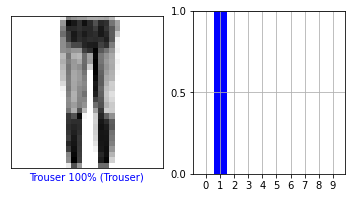

In [ ]:
i = 3
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, Y_pred[i], Y_true, X_test)

plt.subplot(1,2,2)
plot_value_array(i, Y_pred[i],  Y_true)

plt.show()

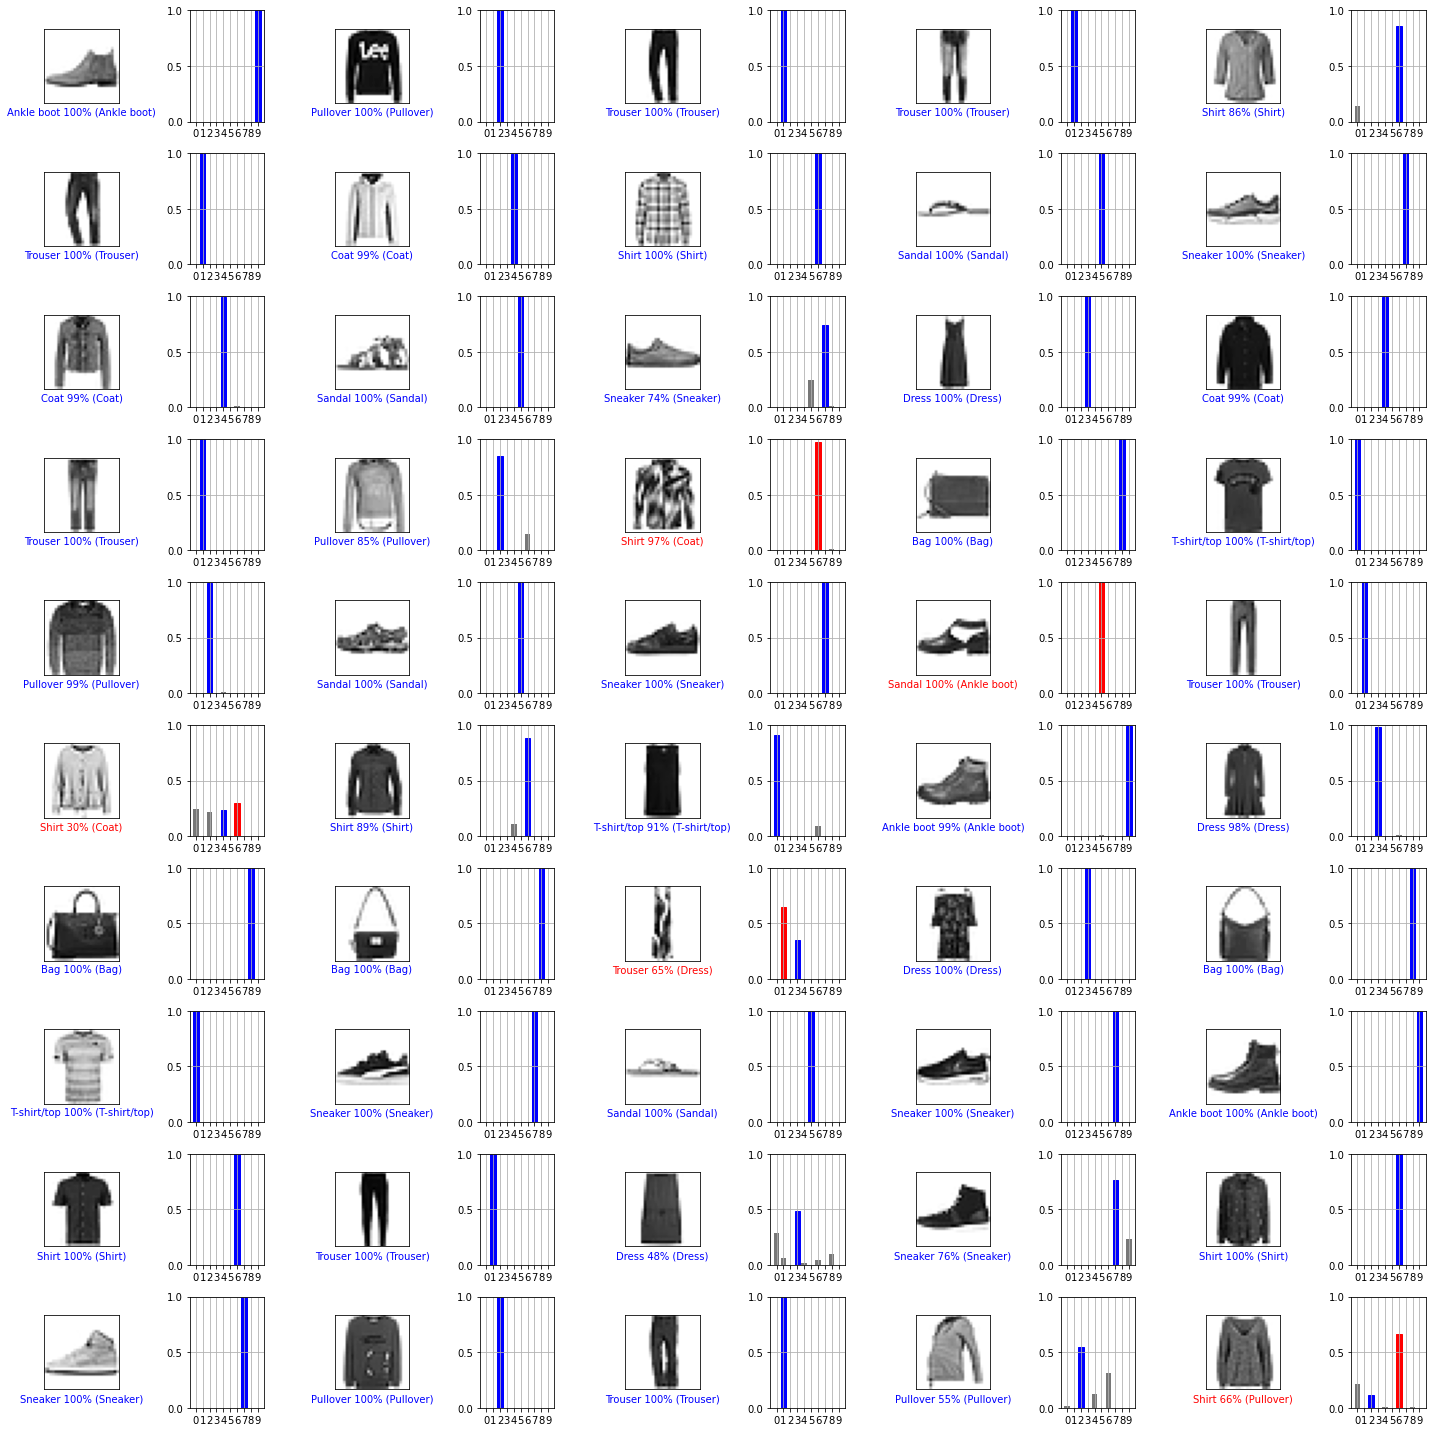

In [ ]:
#讓我們用他們的預測繪製幾個圖像。 請注意，即使非常自信，模型也可能是錯誤的。 繪製prediction全圖
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

#定義列跟行(兩張圖片為一組)
num_rows = 10
num_cols = 5

num_images = num_rows*num_cols #設定圖片張數總共15張圖片

plt.figure(figsize=(2*2*num_cols, 2*num_rows)) #設定總圖大小

for i in range(num_images):
  #subplot(5x6)
  plt.subplot(num_rows, 2*num_cols, 2*i+1) #1/3/5/7/9/....
  plot_image(i, Y_pred[i], Y_true, X_test)
  
  plt.subplot(num_rows, 2*num_cols, 2*i+2) #2/4/6/8/10/......
  plot_value_array(i, Y_pred[i], Y_true)
  
  plt.tight_layout()


plt.show()